In [2]:
import numpy as np                                                 
import pandas as pd                                                
import pandas_profiling 
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline
sns.set()
from datetime import datetime
import calendar
from scipy.stats import norm
from scipy import stats


In [14]:
def get_dataframe_from_csv(filename):
    dataset = pd.read_csv(filename)
    return dataset

def check_missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    
    return missing_data


In [5]:
dataset = get_dataframe_from_csv("/home/forhad/Study/Self_Work/XXX/dataset_trvg_case-2.csv")

In [6]:
dataset['date_ymd'] = dataset['date_ymd'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
dataset

,date_ymd,time_to_travel_grouping,length_of_stay_grouping,platform_country_code,adv_id,clicks,bookings,booking_rev_EURcent,cost_EURcent
0,2020-07-29,8,1,FI,345,22,0,0,51
1,2020-04-28,41,13,US,64,5,0,0,146
2,2020-08-10,2,1,IL,64,351,5,103666,3474
3,2020-08-24,8,15,TR,139,8,0,0,48
4,2020-09-10,2,13,HK,56,7,0,0,73
...,...,...,...,...,...,...,...,...,...
1008213,2020-04-15,41,8,HU,56,9,0,0,8
1008214,2020-10-22,29,2,TW,56,53,2,25779,666
1008215,2020-12-07,15,8,ZA,56,5,0,0,44
1008216,2020-06-16,301,4,CH,56,2,0,0,3


#### Bivariate Analysis

##### Dataset column vs column graph

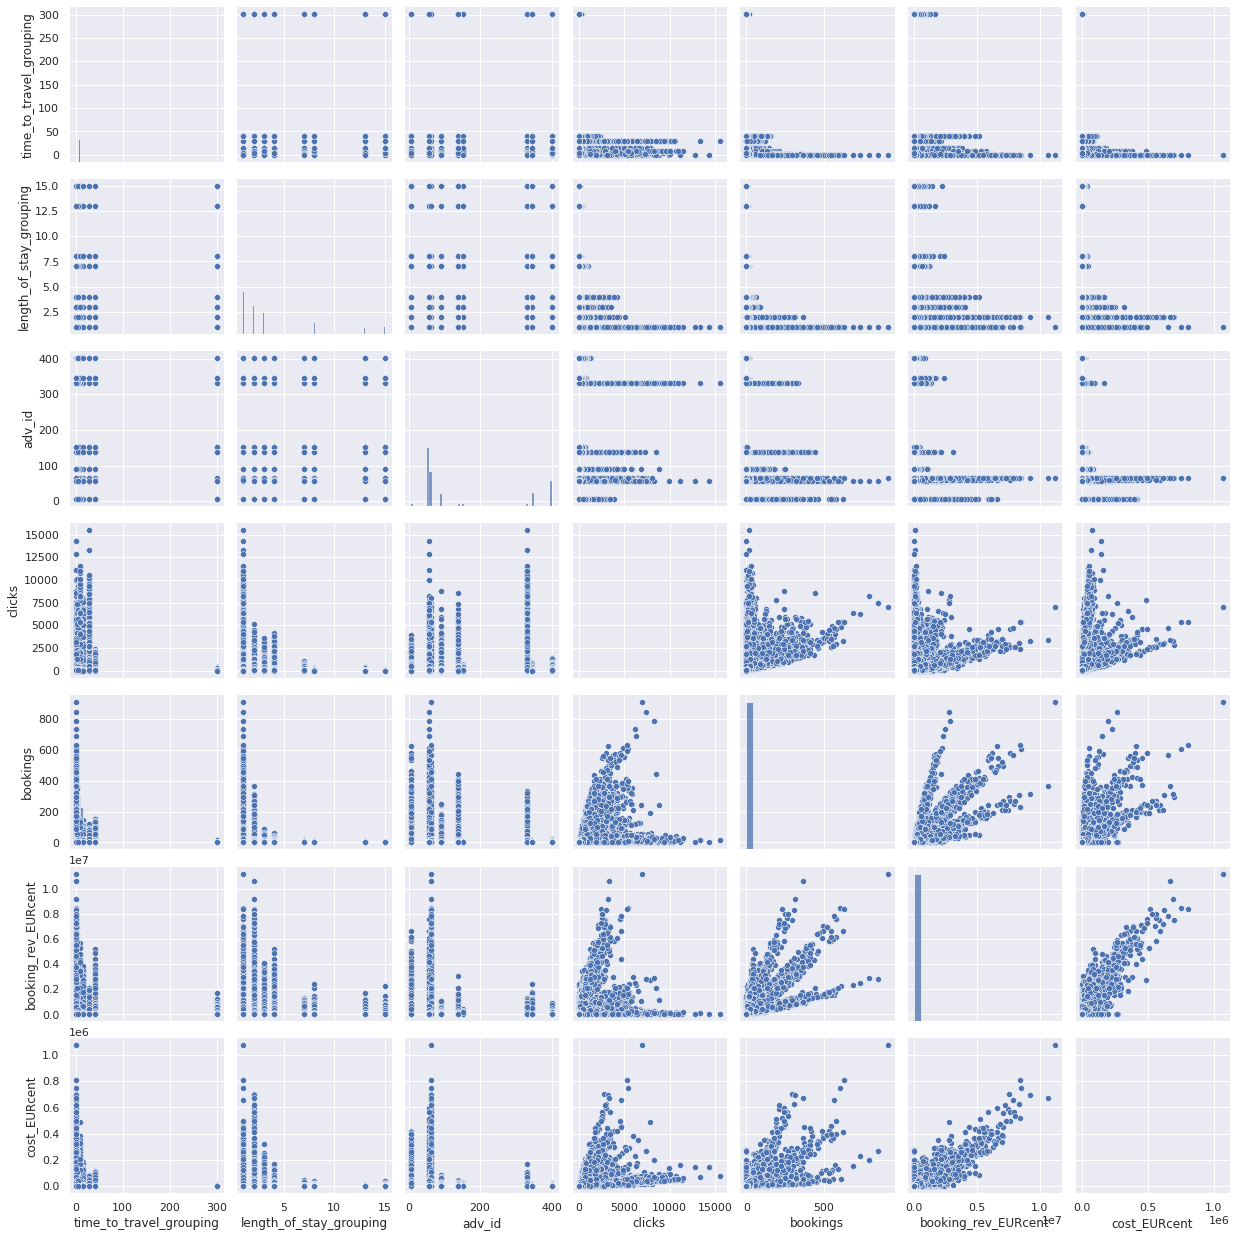

In [15]:
sns.pairplot(dataset)

#### Pair plots between clicks, adv_id and cost_EURcent

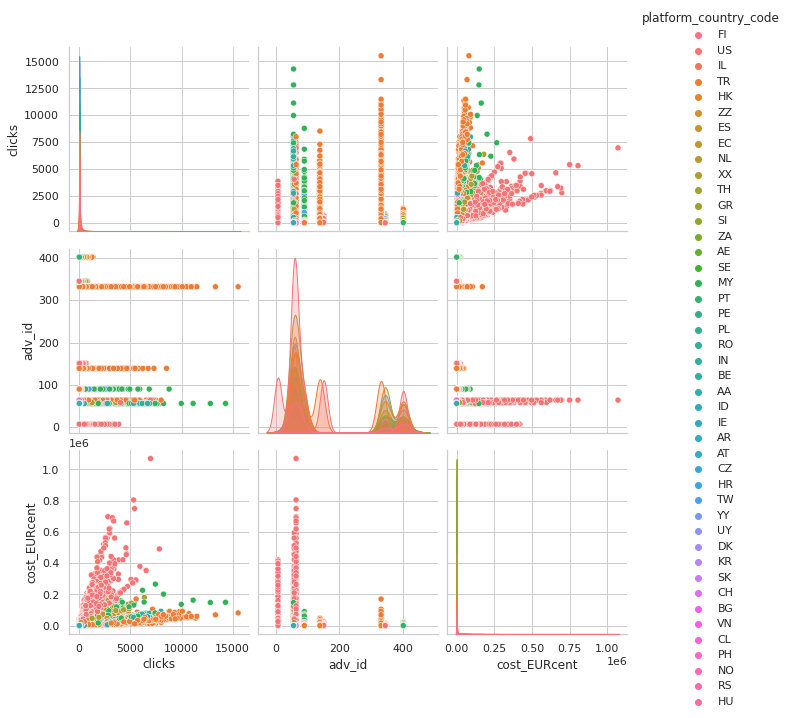

In [16]:
sns.set_palette('Pastel2')
sns.set_style("whitegrid")
sns.pairplot(dataset, vars=['clicks', 'adv_id', 'cost_EURcent'], height=3, hue='platform_country_code')